### 2023/09/29 杉井さんのプログラムを再現
### (参考：https://somoclu.readthedocs.io/en/stable/reference.html)
### (参考：https://punhundon-lifeshift.com/python_list_numpy_series_dataframe_convert)

In [2]:
import numpy as np
import pandas as pd
import somoclu
import matplotlib.pyplot as plt
from preprocess import Preprocess
from view_function import ViewFunction

In [3]:
data = Preprocess('http://skill.shinshu-u.ac.jp/2013/5-13/20130513140841_18-4-0-0-0_strokes.txt/strokes/pointlists', 2)
df = data.df_drop_col_point
stroke_bin_vector = df['px_3mm_grid_flat']

In [4]:
# data (2D numpy.array of float32.) – Training data..
stroke_bin_vector = df['px_3mm_grid_flat'].values
stroke_bin_vector_float = np.array([nd.astype(np.float32) for nd in stroke_bin_vector])
random_codebook = np.random.randint(0, 2, (100, 100, 13860))
random_codebook_float = np.array([nd.astype(np.float32) for nd in random_codebook.astype(np.float32)])
som = somoclu.Somoclu(
            n_columns=100,
            n_rows=100, 
            initialcodebook = random_codebook_float, 
            compactsupport=False
            )
som.train(stroke_bin_vector_float)

In [6]:
activation_map = som.get_surface_state()
bmu = som.get_bmus(activation_map)
bmu

array([[76, 57],
       [61,  3],
       [ 0, 66],
       ...,
       [79, 95],
       [49, 90],
       [99, 98]])

In [16]:
activation_map

array([[27.83017161, 29.76661145, 33.49827543, ..., 32.43767876,
        25.89034859, 26.16279676],
       [26.69336128, 28.69556578, 32.54451485, ..., 30.74872384,
        23.12247474, 23.29577173],
       [21.28747691, 23.78101269, 28.32171849, ..., 28.26881202,
        20.55799079, 20.91149813],
       ...,
       [24.88416281, 26.89746375, 30.90729575, ..., 28.85209896,
        21.89990277, 22.31348198],
       [21.76290951, 24.40629279, 28.94739849, ..., 28.51140364,
        21.10986468, 21.49627506],
       [30.34808968, 31.81709977, 35.16369655, ..., 30.84530599,
        20.65584125, 20.23149589]])

In [15]:
print('入力データ数:', len(stroke_bin_vector))
print('BMUデータ数:', len(bmu))

入力データ数: 822
BMUデータ数: 822


<module 'matplotlib.pyplot' from '/mnt/c/Users/ispec/MyWorkSpace/python/drawing_2023/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

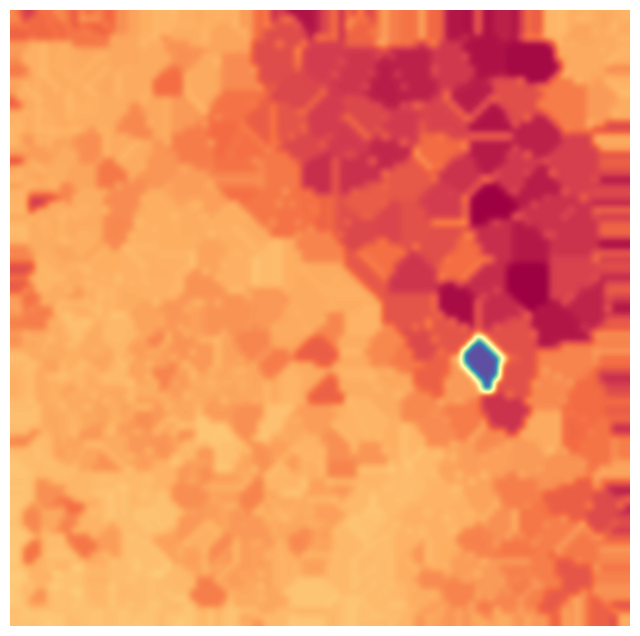

In [17]:
codebook = som.codebook
umatrix = som.umatrix
som.view_activation_map(
    None, 
    0, 
    bestmatches = False, 
    filename = '../temp/test_am.png')

<module 'matplotlib.pyplot' from '/mnt/c/Users/ispec/MyWorkSpace/python/drawing_2023/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

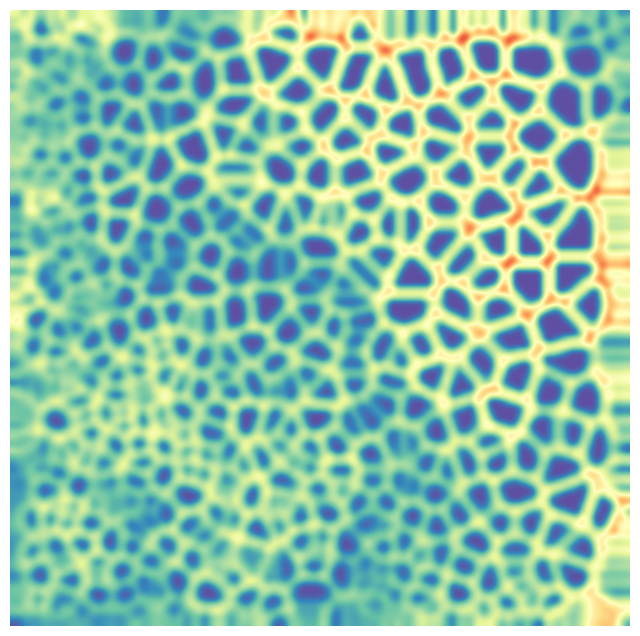

In [21]:
som.view_similarity_matrix(filename='../temp/test_sm.png')
# som.view_umatrix(filename='../temp/test_um.png')